In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from matplotlib.mlab import PCA as mlabPCA
from sklearn import datasets, decomposition, linear_model 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv(
    'DelayedFlights.csv',
    nrows=90000
)
data.head(6)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0


In [3]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
data = data.dropna(thresh=20)

In [5]:
data = data.fillna(0)
null = data.isnull().sum()
null[null>0]

Series([], dtype: int64)

In [6]:
data['ADelay30'] = np.where((data['ArrTime'] - data['CRSArrTime'])>30, 1,0)
data['DDelay30'] = np.where((data['DepTime'] - data['CRSDepTime'])>30, 1,0)

In [7]:
def Depar(time):
    if time > 1:
        return '0001-0559'
    elif time > 559:
        return '0600-0659'
    elif time > 659:
        return '0700-0759'    
    elif time > 759:
        return '0800-0859'    
    elif time > 859:
        return '0900-0959'      
    elif time > 959:
        return '1000-1059'
    elif time > 1059:
        return '1100-1159'
    elif time > 1159:
        return '1200-1259'
    elif time > 1259:
        return '1300-1359'   
    elif time > 1359:
        return '1400-1459'      
    elif time > 1459:
        return '1500-1559'  
    elif time > 1559:
        return '1600-1659'    
    elif time > 1659:
        return '1700-1759' 
    elif time > 1759:
        return '1800-1859'
    elif time > 1859:
        return '1900-1959'
    elif time > 1959:
        return '2000-2059'
    elif time > 2059:
        return '2100-2159'
    elif time > 2159:
        return '2200-2259'
    elif time > 2259:
        return '2300-2359'

In [8]:
def Arrival(time):
    if time > 1:
        return '0001-0559'
    elif time > 559:
        return '0600-0659'
    elif time > 659:
        return '0700-0759'    
    elif time > 759:
        return '0800-0859'    
    elif time > 859:
        return '0900-0959'      
    elif time > 959:
        return '1000-1059'
    elif time > 1059:
        return '1100-1159'
    elif time > 1159:
        return '1200-1259'
    elif time > 1259:
        return '1300-1359'   
    elif time > 1359:
        return '1400-1459'      
    elif time > 1459:
        return '1500-1559'  
    elif time > 1559:
        return '1600-1659'    
    elif time > 1659:
        return '1700-1759' 
    elif time > 1759:
        return '1800-1859'
    elif time > 1859:
        return '1900-1959'
    elif time > 1959:
        return '2000-2059'
    elif time > 2059:
        return '2100-2159'
    elif time > 2159:
        return '2200-2259'
    elif time > 2259:
        return '2300-2359'

In [9]:
def Dis(miles):
    if miles > 0:
        return '0-399'
    elif miles > 400:
        return '400-799'
    elif miles > 800:
        return '800-1199'
    elif miles > 1200:
        return '1200-1599'
    elif miles > 1600:
        return '1600-1999'
    elif miles > 2000:
        return '>2000'

In [10]:
data['Depar'] = data['DepTime'].apply(Depar)
data['Arrival'] = data['ArrTime'].apply(Arrival)
data['Dis'] = data['Distance'].apply(Dis)

<Figure size 1080x360 with 0 Axes>

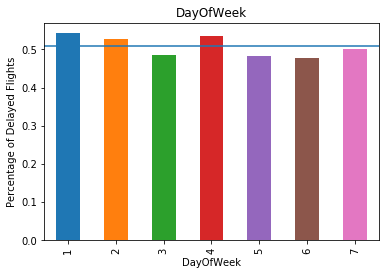

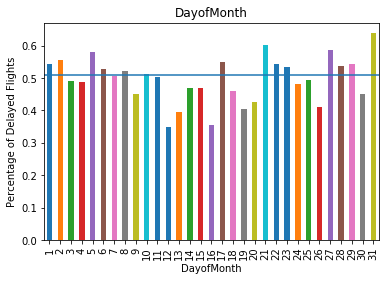

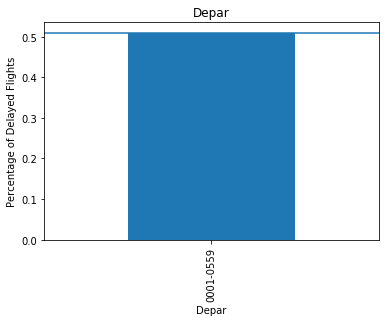

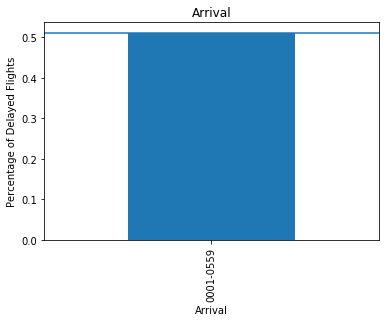

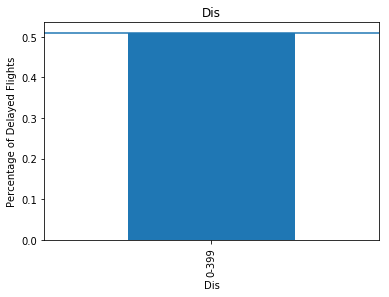

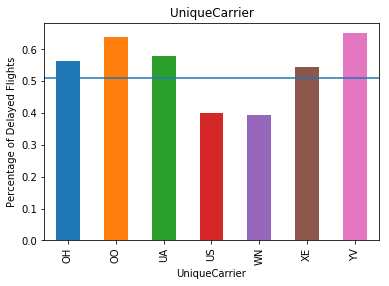

In [13]:
avgLate = np.sum(data['ADelay30'])/len(data['ADelay30'])
attributes = ['DayOfWeek', 'DayofMonth', 'Depar','Arrival','Dis','UniqueCarrier']
for i, pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ADelay30']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='ADelay30')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percentage of Delayed Flights')
    plt.title(pred)
    plt.legend().remove()